In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)
files = os.listdir()
print("Files in Directory:", files)

Current Directory: /Users/amarachiordor/Documents/HNG Data Analysis/Oshoke's Project
Files in Directory: ['Indicino Project.ipynb', 'Indicino project.xlsx - Attrition_data.csv', 'Indicino project.xlsx', '.ipynb_checkpoints']


In [3]:
#What This Code Does:
#Loads the dataset into Python.
#Prints the structure of the dataset (how many rows and columns it has).
#Checks if any data is missing (e.g., empty cells).
#Gives summary statistics (e.g., average salary, minimum and maximum age).
#Shows unique values in text-based columns like “JobRole” and “Department”.

df = pd.read_csv("Indicino project.xlsx - Attrition_data.csv")

# Display basic information
print(df.info())

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isna().sum())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13   JobInvolvement           1470 non-null   object
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

In [5]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
 JobInvolvement : [' $ 3 ' ' $ 2 ' ' $ 4 ' ' $ 1 ']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [6]:
# Drop EmployeeCount and StandardHours as they have constant values
df.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

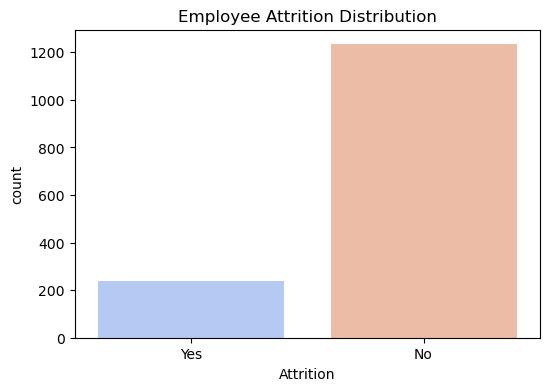

In [7]:
# Creates a simple bar chart to show how many employees left the company vs. how many stayed.
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', hue='Attrition', data=df, palette='coolwarm', legend=False)
plt.title("Employee Attrition Distribution")
plt.show()

In [8]:
# Convert categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


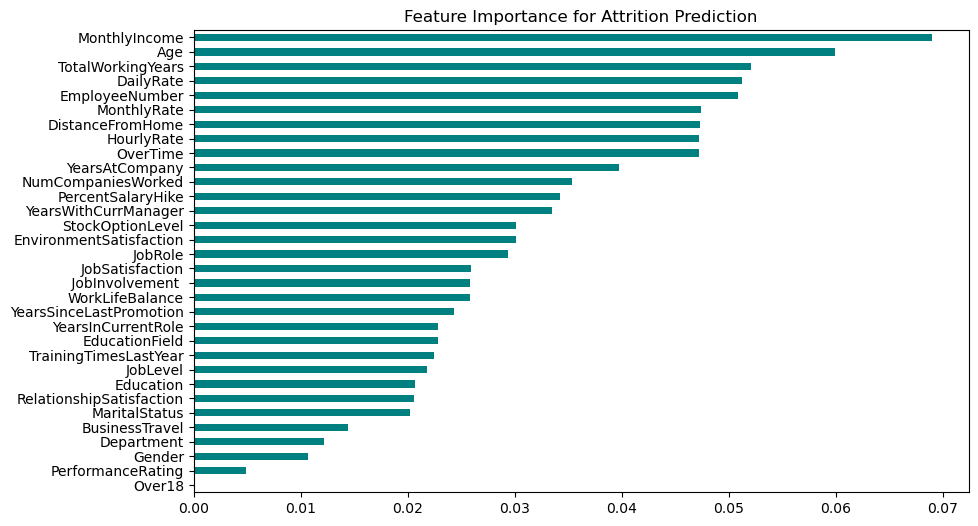

In [10]:
#We want to find which factors (like salary, job satisfaction, etc.) are most related to employees leaving.
#Uses a machine learning model to find the most important factors that affect employee attrition.
#Creates a bar chart to show which features (salary, distance from home, job role, etc.) matter most.

from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
X = df.drop(columns=['Attrition'])  # Everything except Attrition
y = df['Attrition']  # The target we want to predict

# Train a model to find important factors
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Show which factors are most important
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6), color="teal")
plt.title("Feature Importance for Attrition Prediction")
plt.show()


In [11]:
# We’ll train a model to predict which job roles are at the highest risk of losing employees.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Attrition"])  # Drop the target variable
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model with increased max_iter and saga solver
log_model = LogisticRegression(max_iter=2000, solver="saga")
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



JobRole
8    0.397590
2    0.239382
1    0.230769
7    0.174847
6    0.160959
4    0.068966
0    0.068702
3    0.049020
5    0.025000
Name: Attrition, dtype: float64


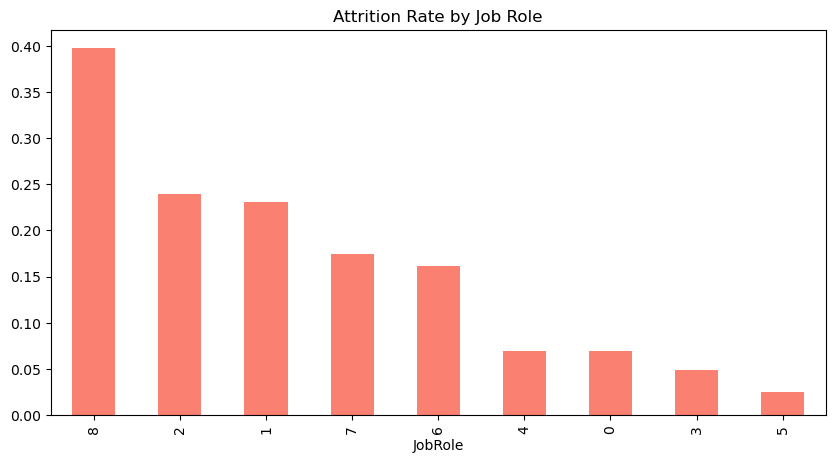

In [23]:
#Prints job roles with the highest resignation rates.
# Identify job roles with the highest attrition rate
job_role_attrition = df.groupby("JobRole")["Attrition"].mean().sort_values(ascending=False)
print(job_role_attrition)

# Visualize job roles most affected
plt.figure(figsize=(10,5))
job_role_attrition.plot(kind='bar', color="salmon")
plt.title("Attrition Rate by Job Role")
plt.show()

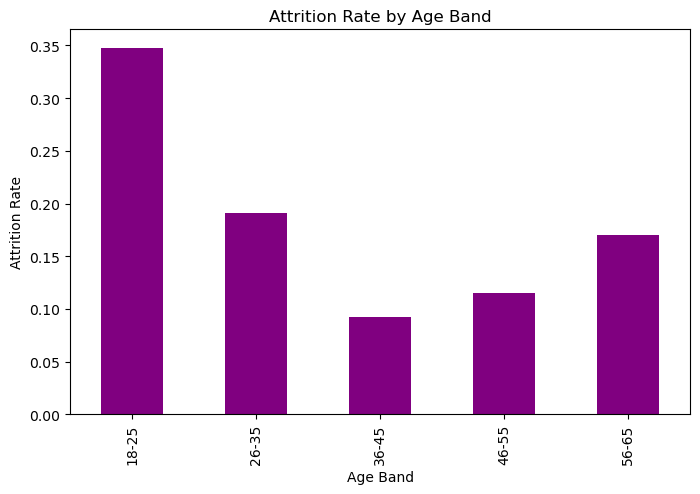

In [25]:
#Grouping employees into age bands to see which age group is most likely to stay.

# Create Age Bands
df['AgeBand'] = pd.cut(df['Age'], bins=[18,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56-65'])

# Attrition by Age Band (fixing the FutureWarning)
age_attrition = df.groupby("AgeBand", observed=True)["Attrition"].mean()

# Plot
plt.figure(figsize=(8,5))
age_attrition.plot(kind='bar', color="purple")
plt.title("Attrition Rate by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Attrition Rate")
plt.show()

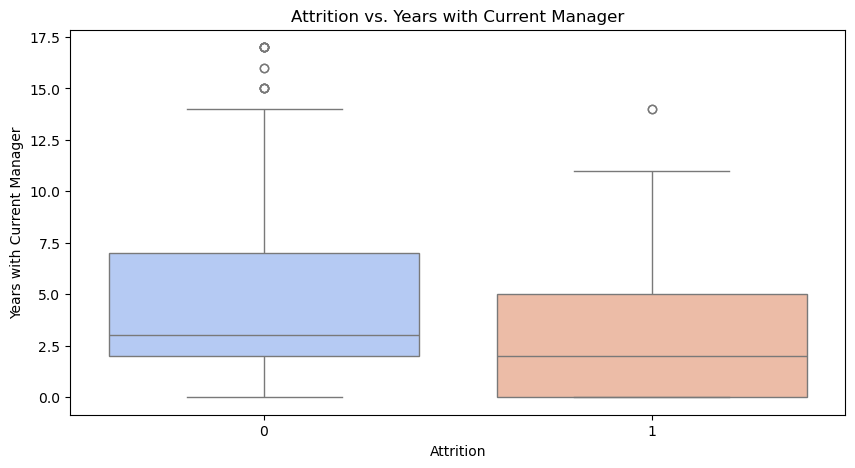

In [27]:
#Shows whether employees who stay with the same manager longer are more likely to leave.

# Relationship between YearsWithCurrManager and Attrition
plt.figure(figsize=(10,5))
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, hue='Attrition', palette='coolwarm', legend=False)
plt.title("Attrition vs. Years with Current Manager")
plt.xlabel("Attrition")
plt.ylabel("Years with Current Manager")
plt.show()

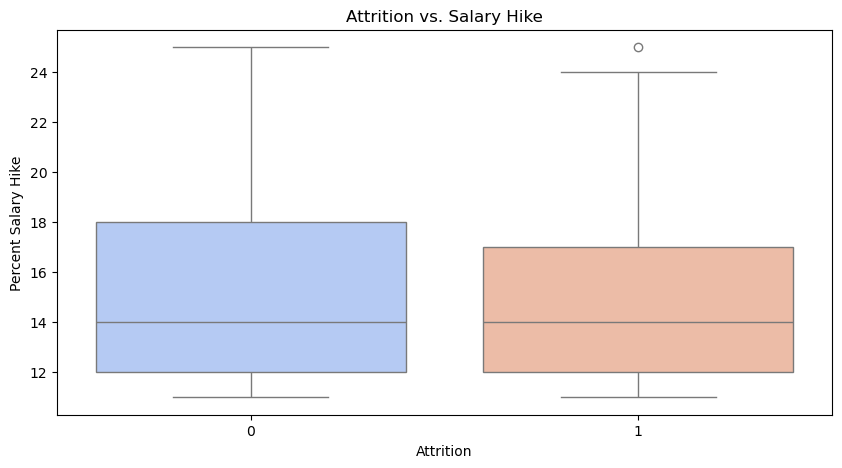

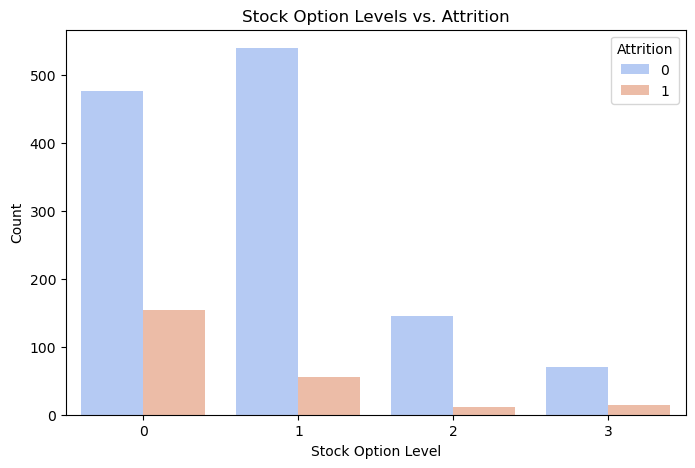

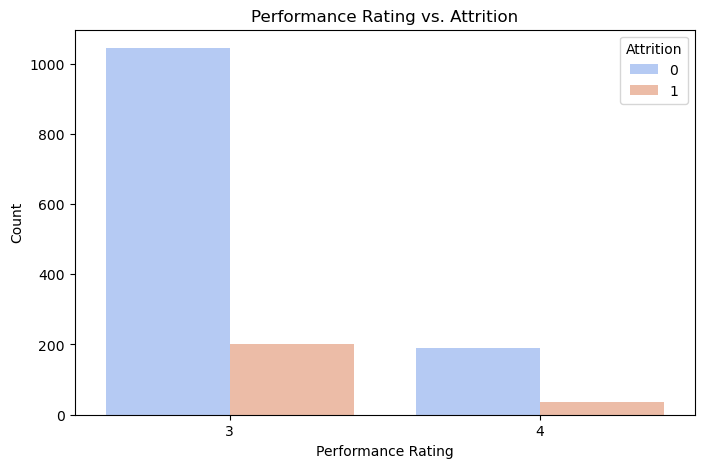

In [31]:
#Finds out if salary hikes, stock options, and performance ratings impact attrition.

# Salary Hike vs Attrition
plt.figure(figsize=(10,5))
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df, hue='Attrition', palette='coolwarm', legend=False)
plt.title("Attrition vs. Salary Hike")
plt.xlabel("Attrition")
plt.ylabel("Percent Salary Hike")
plt.show()

# Stock Options vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df, palette="coolwarm")
plt.title("Stock Option Levels vs. Attrition")
plt.xlabel("Stock Option Level")
plt.ylabel("Count")
plt.show()

# Performance Ratings vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette="coolwarm")
plt.title("Performance Rating vs. Attrition")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()